In [1]:
#import Library
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
#Import Dataset
df = pd.read_csv('Dry_Bean_Datset.csv', delimiter=',')
print(df)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

In [3]:
# Encode Kolom Label
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [4]:
# Split the data into Atribute and target
X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Initialize the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(le.classes_), activation='softmax'))
#print (X_train.shape)
#print (le.classes_)

In [8]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Epoch 1/50


273/273 [==============================] - 2s 4ms/step - loss: 0.7124 - accuracy: 0.8084 - val_loss: 0.2710 - val_accuracy: 0.9091
Epoch 2/50
273/273 [==============================] - 1s 3ms/step - loss: 0.2354 - accuracy: 0.9175 - val_loss: 0.2249 - val_accuracy: 0.9215
Epoch 3/50
273/273 [==============================] - 1s 3ms/step - loss: 0.2143 - accuracy: 0.9202 - val_loss: 0.2182 - val_accuracy: 0.9224
Epoch 4/50
273/273 [==============================] - 1s 3ms/step - loss: 0.2052 - accuracy: 0.9219 - val_loss: 0.2122 - val_accuracy: 0.9256
Epoch 5/50
273/273 [==============================] - 1s 3ms/step - loss: 0.2022 - accuracy: 0.9247 - val_loss: 0.2072 - val_accuracy: 0.9279
Epoch 6/50
273/273 [==============================] - 1s 3ms/step - loss: 0.1977 - accuracy: 0.9246 - val_loss: 0.2090 - val_accuracy: 0.9293
Epoch 7/50
273/273 [==============================] - 1s 3ms/step - loss: 0.1943 - accuracy: 0.9258 - val_loss: 0.2094 - val_accuracy: 0.9275
Epoc

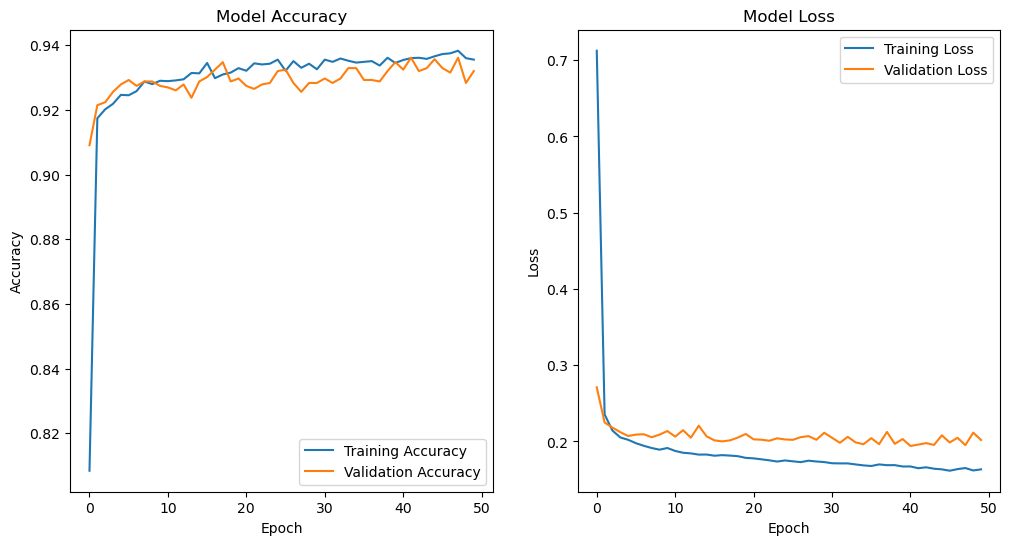

In [10]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
# Predict on all data in X_test
all_data_predictions = model.predict(X_test)

# Use predict_classes if available
#try:
    #all_data_pred_classes = model.predict_classes(X_test)
#except AttributeError:
    # For newer versions of Keras, predict_classes is deprecated
    #all_data_pred_classes = np.argmax(all_data_predictions, axis=1)
    


# Convert predictions to class labels
all_data_pred_classes = np.argmax(all_data_predictions, axis=1)
predicted_labels_all_data = le.inverse_transform(all_data_pred_classes)

# Evaluate the predictions
true_labels_all_data = le.inverse_transform(y_test)

# Accuracy
accuracy_all_data = accuracy_score(true_labels_all_data, predicted_labels_all_data)
print(f"\nAccuracy for All Data: {accuracy_all_data * 100:.2f}%")

86/86 [==============================] - 0s 2ms/step

Accuracy for All Data: 93.17%


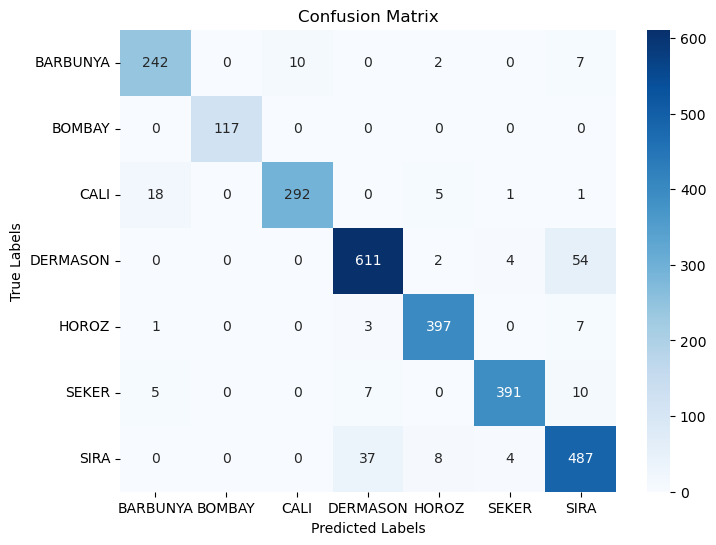

In [12]:
# Confusion Matrix
#print("Confusion Matrix for All Data:")
conf_matrix_all_data = confusion_matrix(true_labels_all_data, predicted_labels_all_data)
target_names = le.classes_

# Visualize the Confusion Matrix with Labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_all_data, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [13]:
# Classification Report
print("\nClassification Report for All Data:")
classification_rep_all_data = classification_report(true_labels_all_data, predicted_labels_all_data, target_names=target_names)
print(classification_rep_all_data)


Classification Report for All Data:
              precision    recall  f1-score   support

    BARBUNYA       0.91      0.93      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.97      0.92      0.94       317
    DERMASON       0.93      0.91      0.92       671
       HOROZ       0.96      0.97      0.97       408
       SEKER       0.98      0.95      0.96       413
        SIRA       0.86      0.91      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [14]:
# Show the predicted class labels
print("Predicted Class Labels for All Data in X_test:")
print(predicted_labels_all_data)

# Total correct predictions
total_correct_predictions_all_data = np.trace(conf_matrix_all_data)
print(f"\nTotal Data Benar: {total_correct_predictions_all_data}")

# Total incorrect predictions
total_incorrect_predictions_all_data = np.sum(conf_matrix_all_data) - total_correct_predictions_all_data
print(f"Total Data Salah: {total_incorrect_predictions_all_data}")

Predicted Class Labels for All Data in X_test:
['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'DERMASON']

Total Data Benar: 2537
Total Data Salah: 186
